In [2]:
import numpy as np

np.random.seed(123456789) # random seed for consistency

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

In [5]:
class1_sample

array([[ 2.212902  ,  0.08238248,  1.15727052,  0.8478706 ,  0.83180456,
        -1.67666183, -0.80288458,  0.18993115,  0.57964676,  0.32321392,
         0.27613222,  0.09642087,  3.28724603,  2.02425663, -0.46634995,
         1.13707908, -0.01902547, -0.13065605, -0.70684046,  0.69419178],
       [ 2.1283978 ,  0.85896368,  1.37591514,  0.52969142,  0.23359639,
         0.03332262, -0.83511902, -0.05553701, -0.32022184,  1.3743362 ,
         0.16255978, -1.88685108,  0.20887862,  0.31962522,  0.36948569,
        -1.73136278,  0.85122081, -0.97135698, -0.63678034,  1.0559576 ],
       [ 1.8417114 , -0.82601643,  0.94302846, -0.56940469, -0.84767033,
         0.38044469, -1.06883444,  1.06244261, -0.26975584, -0.20494313,
        -0.43567345,  0.58084648, -0.5197155 , -0.54229195, -0.32657848,
        -1.25268671, -0.43078668, -1.71895239,  0.12301059,  0.38246087]])

Populating the interactive namespace from numpy and matplotlib


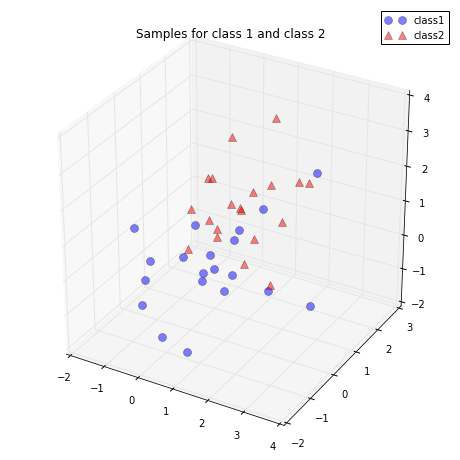

In [6]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [7]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [8]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.70557161]
 [ 0.51217168]
 [ 0.53242884]]


In [13]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 38.06005602   7.0360561    8.746127  ]
 [  7.0360561   46.74633774  16.76718342]
 [  8.746127    16.76718342  51.41006712]]


In [15]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 0.97589887  0.18041169  0.22425967]
 [ 0.18041169  1.19862404  0.42992778]
 [ 0.22425967  0.42992778  1.31820685]]


In [17]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[ 0.3318243 ]
 [ 0.61650901]
 [ 0.7140093 ]]
Eigenvalue 1 from scatter matrix: 69.95225862431023
Eigenvalue 1 from covariance matrix: 1.7936476570335962
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[ 0.92464385]
 [-0.36251028]
 [-0.11670499]]
Eigenvalue 2 from scatter matrix: 34.19763985444257
Eigenvalue 2 from covariance matrix: 0.8768625603703227
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[-0.18688603]
 [-0.69892986]
 [ 0.69034098]]
Eigenvalue 3 from scatter matrix: 32.06656238803944
Eigenvalue 3 from covariance matrix: 0.8222195484112671
Scaling factor:  39.0
----------------------------------------


In [18]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

In [19]:
eigv

array([[-0.18688603],
       [-0.69892986],
       [ 0.69034098]])

Populating the interactive namespace from numpy and matplotlib


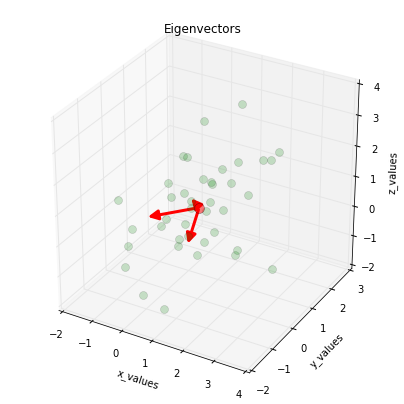

In [20]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [21]:
for ev in eig_vec_sc:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

In [22]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

69.9522586243
34.1976398544
32.066562388
